<a href="https://colab.research.google.com/github/vishal19217/CyberBullying_Sentiment_Analysis/blob/main/Preprocessing3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip uninstall matplotlib
# !pip install -U matplotlib
#Libraries for general purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install emoji
!pip install unidecode
#Text cleaning
import re, string
import emoji
import unidecode 
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))


#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libpng16-cfdb1654.so.16.21.0
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libz-a147dcb0.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cyberbullying_tweets.csv")
df = df.rename(columns={'tweet_text': 'text', 'cyberbullying_type': 'sentiment'})
df.duplicated().sum()
df = df[~df.duplicated()]
df.sentiment.value_counts()

religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: sentiment, dtype: int64

In [ ]:
##CUSTOM DEFINED FUNCTIONS TO CLEAN THE TWEETS

#Clean emojis from text
def strip_emoji(text):
    return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji

#Remove punctuations, links, stopwords, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = unidecode.unidecode(text) #remove texts such as  àéêöhello
    text = text.replace('\r', '').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    text =' '.join(word for word in text.split() if len(word) < 14) # remove words longer than 14 characters
    return text

#remove contractions
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the "#" symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as "&" and "$" present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

#Remove multiple sequential spaces
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

# Stemming just removes or stems the last few characters of a word, often leading to incorrect meanings and spelling. 
# Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma. 
# Sometimes, the same word can have multiple different Lemmas.
#Stemming
def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

#Lemmatization 
#NOTE:Stemming seems to work better for this dataset
def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

#Then we apply all the defined functions in the following order
def deep_clean(text):
    text = strip_emoji(text)
    text = decontract(text)
    text = strip_all_entities(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    text = stemmer(text)
    return text

In [ ]:
texts_new = []
for t in df.text:
    texts_new.append(deep_clean(t))
df['text_clean'] = texts_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  """


3023

,text,sentiment,text_clean
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandr food crapilici mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock today sunris studi...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thank head concern anoth angri dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretend kurdish account like islam...


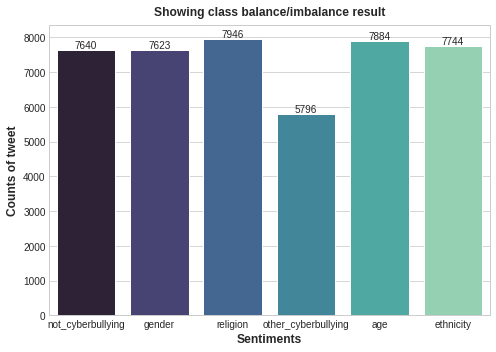

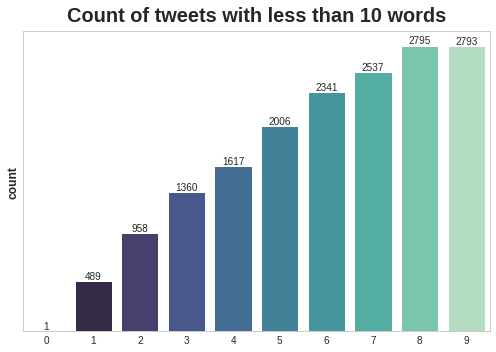

,text,sentiment,text_clean,text_len
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandr food crapilici mkr,5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock today sunris studi...,10
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classi whore red velvet cupcak,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thank head concern anoth angri dude twitter,9
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretend kurdish account like islam...,8


In [ ]:
df.head()
display(df["text_clean"].duplicated().sum())
df.drop_duplicates("text_clean", inplace=True)
# display(df.sentiment.value_counts())

display(df.head())
plt.figure(figsize=(7,5))
plt.title('Showing class balance/imbalance result');
ax = sns.countplot(x='sentiment', data=df, palette='mako');
ax.bar_label(ax.containers[0])
plt.xlabel('Sentiments');
plt.ylabel('Counts of tweet');
plt.show();

sentiments = ["religion","age","ethnicity","gender","not bullying","other_cyberbullying"]
#calculating length of each tweet
text_len = []
for text in df.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)
df['text_len'] = text_len

plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
ax.bar_label(ax.containers[0])
plt.yticks([])
plt.ylabel('count')
plt.xlabel('')
plt.show()
df.head()


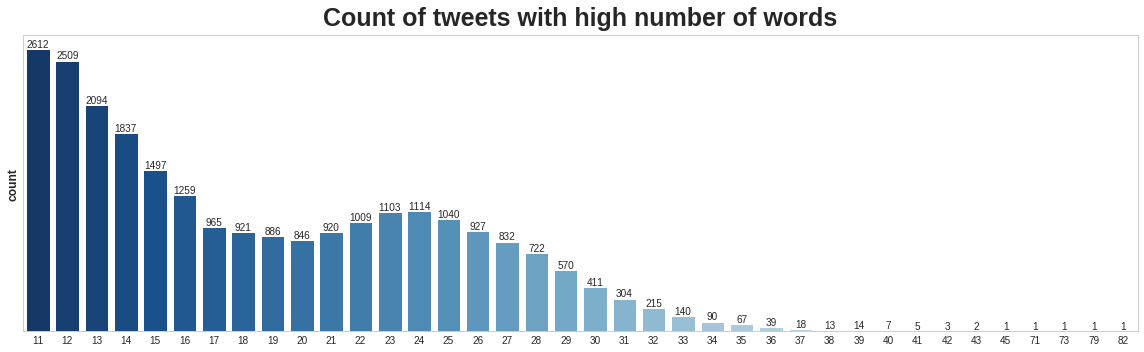

,text,sentiment,text_clean,text_len
25411,@Sweetie_Niesha: So Im getting bullied via twi...,other_cyberbullying,im get bulli via twitter read breitbart rt lt3...,82
4846,@andrea_gcav: @viviaanajim recuerdas como noso...,not_cyberbullying,recuerda como nosotra tambien eramo victima de...,79
44294,@JasmineLovvee If He Dont Want You Well Fuck H...,ethnicity,dont want well fuck aint worth tear never swea...,73
25939,If cats looked like frogs we'd realize what na...,other_cyberbullying,cat look like frog would realiz nasti cruel li...,71
45930,"Get off ur ego trip, take off ur rose colored ...",ethnicity,get ur ego trip take ur rose color glass amp g...,45
...,...,...,...,...
3322,Happy bday samya,not_cyberbullying,happi bday samya,3
46614,Then why are you bringing up his past? What do...,ethnicity,bring past anyth,3
29107,@bullysteria Gracias Bully :3,other_cyberbullying,gracia bulli 3,3
7060,Biting of the lip is a turn on. #RandomThought...,not_cyberbullying,bite lip turn,3


In [ ]:
#removing the text lines with <2 words and >100 words
df = df[df['text_len'] > 2]
df.sort_values(by=['text_len'], ascending=False)
plt.figure(figsize=(16,5))
ax = sns.countplot(x='text_len', data=df[(df['text_len']<=1000) & (df['text_len']>10)], palette='Blues_r')
plt.title('Count of tweets with high number of words', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()
df = df[df['text_len'] < 100]
df.sort_values(by=["text_len"], ascending=False)

In [ ]:
#Encoding the numerically encoding the labels
df['sentiment'] = df['sentiment'].replace({'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4,'other_cyberbullying':5})
display(df.sentiment.value_counts())
df.head()


0    7937
1    7869
2    7732
3    7464
4    6967
5    5203
Name: sentiment, dtype: int64

,text,sentiment,text_clean,text_len
0,"In other words #katandandre, your food was cra...",4,word katandandr food crapilici mkr,5
1,Why is #aussietv so white? #MKR #theblock #ImA...,4,aussietv white mkr theblock today sunris studi...,10
2,@XochitlSuckkks a classy whore? Or more red ve...,4,classi whore red velvet cupcak,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",4,meh p thank head concern anoth angri dude twitter,9
4,@RudhoeEnglish This is an ISIS account pretend...,4,isi account pretend kurdish account like islam...,8


In [ ]:
display(df.iloc[:,2])

0                       word katandandr food crapilici mkr
1        aussietv white mkr theblock today sunris studi...
2                           classi whore red velvet cupcak
3        meh p thank head concern anoth angri dude twitter
4        isi account pretend kurdish account like islam...
                               ...                        
47687    black ppl expect anyth depend anyth yet free p...
47688    turner withhold turner call court abomin concl...
47689    swear god dumb nigger bitch got bleach hair re...
47690    yea fuck rt your nigger fuck unfollow fuck dum...
47691    bro u got ta chill rt dog fuck kp dumb nigger ...
Name: text_clean, Length: 43172, dtype: object

In [ ]:
#Word2Vec Embedding
from nltk.tokenize import TweetTokenizer
from gensim.models import Word2Vec
tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)


df["tokenized"] = [tokenizer.tokenize(i) for i in df['text_clean']]



In [ ]:
# class MeanEmbeddingVectorizer():
#     def __init__(self, word2vec):
#         self.word2vec = word2vec
#         self.dim = len(next(iter(word2vec.values())))

#     def transform(self, X):
#         return np.array([np.mean([self.word2vec[w] for w in words if w in self.word2vec] or [np.zeros(self.dim)], axis=0) for words in X])
    
#     def fit(self, X, y):
#         return self
# model = Word2Vec(df["tokenized"], min_count=1)
# keys_dict = model.wv.vocab
# w2v={}
# for word in keys_dict:
#   w2v[word] = model.wv[word]
# modelw = MeanEmbeddingVectorizer(w2v)


In [ ]:
#ClassAppendTrimVectorizer()
class AppendTrimVectorizer():
    def __init__(self, word2vec,seqLen):
        self.word2vec = word2vec
        self.seqLen = seqLen
        self.dim = len(next(iter(word2vec.values())))

    def transform(self, X):
        # First we need to split the text into its tokens and learn the length
        # If length is shorter than the max len we'll add some spaces (100D vectors which has only zero values)
        # If it's longer than the max len we'll trim from the end.
        res = []
        for sent in X:
          len_v = len(sent) if len(sent) < self.seqLen else self.seqLen
          vec = []
          for tok in sent[:len_v]:
            try:
                vec.append(self.word2vec[tok])
            except Exception as E:
                pass
          last_pieces = self.seqLen - len(vec)
          for i in range(last_pieces):
              vec.append(np.zeros(100,))
          vec = np.array(vec).flatten()
          res.append(vec)
        return np.array(res)


        # return np.array([np.mean([self.word2vec[w] for w in words if w in self.word2vec] or [np.zeros(self.dim)], axis=0) for words in X])
    
    def fit(self, X, y):
        return self
#Model contains embedding for words and corresponding vectors
model = Word2Vec(df["tokenized"], min_count=1)

keys_dict = model.wv.vocab
w2v={}
for word in keys_dict:
  w2v[word] = model.wv[word]
modelw = AppendTrimVectorizer(w2v,40)


In [18]:
#Train and Splitting the dataset
#Seed for reproducibility
import random
import torch

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

seed_value=42
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)
# df2 = df
X1 = df['text_clean']
X = df['tokenized']
y1 = df['sentiment']
#Training and Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state=seed_value)
display(df.sentiment.value_counts())
ros = RandomOverSampler()
# display(X_train)
X_train, y_train = ros.fit_resample(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1));

train_os = pd.DataFrame(list(zip(np.array([x[0] for x in X_train]), y_train)), columns = ['text_clean', 'sentiment']);
X_train = list(train_os['text_clean'].values)

display(train_os.sentiment.value_counts())


0    7937
1    7869
2    7732
3    7464
4    6967
5    5203
Name: sentiment, dtype: int64

2    6349
1    6349
5    6349
4    6349
3    6349
0    6349
Name: sentiment, dtype: int64

In [ ]:
from sklearn.model_selection import learning_curve
def drawCurveTvsCross(model,X_train,y,name):
                                                                                                                            
  sizes, training_scores, testing_scores = learning_curve(LogisticRegression(max_iter = 100), X_train, y, cv=5, scoring='accuracy', train_sizes=np.linspace(100, 20000, 10, dtype=int))
  # Mean and Standard Deviation of training scores
  mean_training = np.mean(training_scores, axis=1)
  Standard_Deviation_training = np.std(training_scores, axis=1)

  # Mean and Standard Deviation of testing scores
  mean_testing = np.mean(testing_scores, axis=1)
  Standard_Deviation_testing = np.std(testing_scores, axis=1)

  # Dotted blue line is for training scores and green line is for cross-validation score
  plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
  plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

  # Drawing plot
  plt.title("Learning Curve for Logisitic regression with {} embeddings".format(name))
  plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
  plt.tight_layout()
  plt.show()

In [16]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
X = df['tokenized']
X_w2v = modelw.transform(X)
X = X_w2v
# display(X[0])
y = y1 
# first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=500)
X_pca = pca.fit_transform(X)

Sum of variance ratios:  1.0000000000000002


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classification Report for Logistic Regression:
                      precision    recall  f1-score   support

           religion       0.84      0.85      0.85      1588
                age       0.95      0.96      0.96      1574
          ethnicity       0.87      0.86      0.86      1546
             gender       0.80      0.72      0.76      1493
       not bullying       0.55      0.67      0.60      1393
other_cyberbullying       0.49      0.40      0.44      1041

           accuracy                           0.77      8635
          macro avg       0.75      0.74      0.74      8635
       weighted avg       0.77      0.77      0.77      8635



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


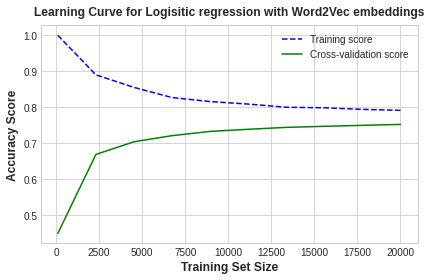

In [19]:
#Logistic Reg with word2Vec Embedding
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression


#Training and Splitting the dataset

pca_model = PCA(n_components=500)
pca_model.fit(X_w2v)

print("Sum of variance ratios: ",sum(pca_model.explained_variance_ratio_))
X_w2v = pca_model.transform(X_w2v)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_w2v, y1, test_size=0.2, stratify=y1, random_state=seed_value)
logisticRegr = LogisticRegression(max_iter = 100)
logisticRegr.fit(X_train2, y_train2)
pred = logisticRegr.predict(X_test2)
print('Classification Report for Logistic Regression:\n',classification_report(y_test2, pred, target_names=sentiments))


sizes, training_scores, testing_scores = learning_curve(LogisticRegression(max_iter = 100), X_train2, y_train2, cv=5, scoring='accuracy', train_sizes=np.linspace(100, 20000, 10, dtype=int))
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
# Dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
# Drawing plot
name = "Word2Vec"
plt.title("Learning Curve for Logisitic regression with {} embeddings".format(name))
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# sizes, training_scores, testing_scores = learning_curve(LogisticRegression(max_iter = 100), X_train2, y_train2, cv=5, scoring='accuracy', train_sizes=np.linspace(100, 20000, 10, dtype=int))
# # Mean and Standard Deviation of training scores
# mean_training = np.mean(training_scores, axis=1)
# Standard_Deviation_training = np.std(training_scores, axis=1)
# # Mean and Standard Deviation of testing scores
# mean_testing = np.mean(testing_scores, axis=1)
# Standard_Deviation_testing = np.std(testing_scores, axis=1)
# # Dotted blue line is for training scores and green line is for cross-validation score
# plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
# plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
# # Drawing plot
# name = "Word2Vec"
# plt.title("Learning Curve for Logisitic regression with {} embeddings".format(name))
# plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
# plt.tight_layout()
# plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classification Report for Logistic Regression:
                      precision    recall  f1-score   support

           religion       0.86      0.87      0.87      1588
                age       0.95      0.96      0.95      1574
          ethnicity       0.83      0.83      0.83      1546
             gender       0.77      0.68      0.72      1493
       not bullying       0.53      0.65      0.59      1393
other_cyberbullying       0.47      0.40      0.43      1041

           accuracy                           0.75      8635
          macro avg       0.74      0.73      0.73      8635
       weighted avg       0.76      0.75      0.75      8635



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


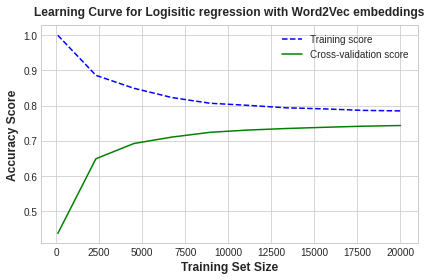

In [ ]:
# Logistic Regression with Word2Vec Embedding
# print(len(w2v['classi']))
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter = 100)
logisticRegr.fit(X_train2, y_train2)
pred = logisticRegr.predict(X_test2)
print('Classification Report for Logistic Regression:\n',classification_report(y_test2, pred, target_names=sentiments))
# drawCurveTvsCross(logisticRegr,X_train2,y_train2,"Word2Vec ")
sizes, training_scores, testing_scores = learning_curve(LogisticRegression(max_iter = 100), X_train2, y_train2, cv=5, scoring='accuracy', train_sizes=np.linspace(100, 20000, 10, dtype=int))
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
# Dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
# Drawing plot
name = "Word2Vec"
plt.title("Learning Curve for Logisitic regression with {} embeddings".format(name))
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
# SVM with Word2vec Embedding
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train2, y_train2)
pred = svm_classifier.predict(X_test2)

print('Classification Report for Logistic Regression:\n',classification_report(y_test2, pred, target_names=sentiments))

Classification Report for Logistic Regression:
                      precision    recall  f1-score   support

           religion       0.87      0.91      0.89      1588
                age       0.95      0.96      0.96      1574
          ethnicity       0.90      0.92      0.91      1546
             gender       0.93      0.69      0.79      1493
       not bullying       0.55      0.69      0.62      1393
other_cyberbullying       0.52      0.47      0.49      1041

           accuracy                           0.80      8635
          macro avg       0.79      0.77      0.78      8635
       weighted avg       0.81      0.80      0.80      8635

